In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cufflinks as cf
from statsmodels.graphics.tsaplots import plot_acf
from lmfit import Model
import plotly.express as px
cf.go_offline()

## Github
Github не позволяет испольнять Javascript при просмотре notebook-файлов, что не позволяет рендерить интерактивные графики. Отчет можно просмотреть использую nbviewer:

https://nbviewer.jupyter.org/github/Xissand/nbody/blob/master/research/pressure/analitics.ipynb

## Зависимость давления от плотности
Данные получены при T=2.0. Система приведена к температуре термостатом, затем термостат выключен, и сняты данные для давления в NVE конфигурации. Данные совпадают или близки с NVT конфигурацией, так как система находится в равновесии. Обрезки потенциала нет, единицы измерения относительные. N=512

Полученные данные совпадают с приведенными в D. Frenkel, B. Smith. Understanding molecular simulation, стр. 53, левый график.
Даннные хорошо описываются зависимостью $$p=Ae^{B \rho}$$ где $A=(81 \pm 7) \times 10^{-3}$ и $B=5.21 \pm 0.10$

In [115]:
ro = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
p = []
for iro in ro:
    name = "p_rho/"+str(iro)+".csv"
    df = pd.read_csv(name)
    pressure = df['P'].loc[80000:100000].mean()
    std = df['P'].loc[80000:100000].std()
    p.append(pressure)
    print("ro="+f'{iro:.2f}'+" p="+f'{pressure:.2f}'+" std="+f'{std:.2f}')
#print(p)

ro=0.10 p=0.18 std=0.01
ro=0.20 p=0.32 std=0.04
ro=0.30 p=0.44 std=0.04
ro=0.40 p=0.68 std=0.10
ro=0.50 p=0.94 std=0.13
ro=0.60 p=1.95 std=0.15
ro=0.70 p=3.02 std=0.10
ro=0.80 p=5.32 std=0.16
ro=0.90 p=8.82 std=0.18


In [116]:
fig = px.scatter(x=ro,y=p,labels={'x':'density', 'y':'pressure'})
fig.update_layout(template='plotly_white',title=r'$T = 2.0$')
fig.show()

In [117]:
def func(x, a, b):
    return a*np.e**(b*x)

In [118]:
mod = Model(func)
result = mod.fit(p, x=ro, a=1, b=1)
print(result.fit_report())
A = float(result.params['a'])
B = float(result.params['b'])

[[Model]]
    Model(func)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 43
    # data points      = 9
    # variables        = 2
    chi-square         = 0.06618177
    reduced chi-square = 0.00945454
    Akaike info crit   = -40.2131735
    Bayesian info crit = -39.8187243
[[Variables]]
    a:  0.08158247 +/- 0.00671523 (8.23%) (init = 1)
    b:  5.20519677 +/- 0.09678886 (1.86%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.994


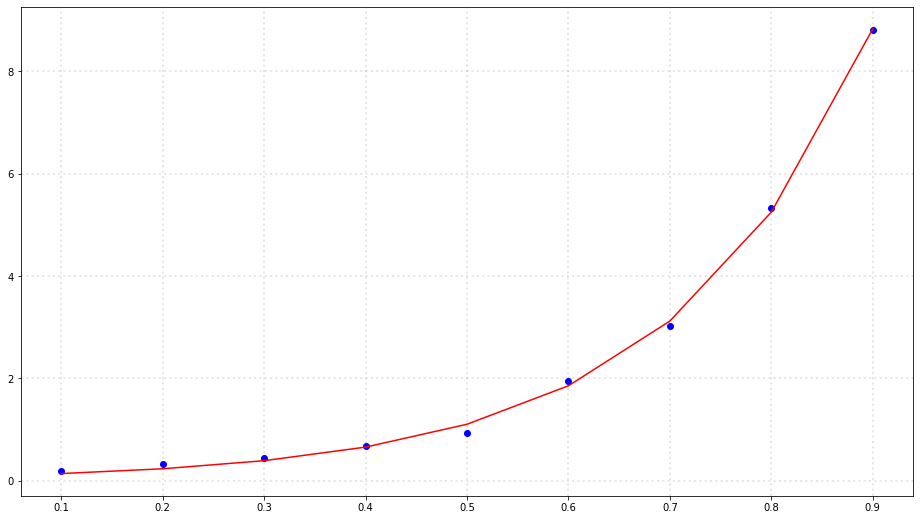

In [119]:
plt.plot(ro, p, 'bo', label='data')
plt.plot(ro, result.best_fit, 'r-', label='fit')
plt.rcParams['figure.figsize'] = [16, 9]
plt.grid(b=True, color='Grey', alpha=0.2, linestyle=':', linewidth=2)
plt.show()

## Зависимость флуктуации давления от количества частиц

Давление - интенсивная термодинамическая величина. Пусть $P$ - суммарное давление системы, $p_{n}$ - давление подсистемы. Тогда, они связаны соотношением $P=\frac{1}{N} \sum_{n} p_{n}$. Тогда, флуктуация давление зависит от количества частиц, как $$ \sigma_P = \frac{\sigma_{p_{n}}}{\sqrt{N}} $$

Полученные данные для плотности $\rho = 1$ соответствуют этой зависимости. Зависимость выполняется лучше при больших $N$.

In [120]:
N = [512, 1024, 2048, 4096, 8192]
dp = []
for n in N:
    name = "dp_N/"+str(n)+".csv"
    df = pd.read_csv(name)
    pressure = df.loc[10000:20000, 'P'].mean()
    std = df.loc[10000:20000, 'P'].std()
    fl = std/pressure
    dp.append(fl)
    print("N="+str(n)+" p="+f'{pressure:.2f}'+" std="+f'{std:.2f}')
print(dp)

N=512 p=268.22 std=7.75
N=1024 p=261.15 std=4.72
N=2048 p=247.00 std=3.58
N=4096 p=257.07 std=2.13
N=8192 p=251.14 std=1.70
[0.028898123167279775, 0.018068518855223637, 0.014505928441864558, 0.008302146843008468, 0.006783466661679593]


In [121]:
fig = px.scatter(x=N,y=dp,labels={'x':'Number of particles', 'y':'Fluctuation of pressure'})
fig.update_layout(template='plotly_white')
fig.show()

In [122]:
def dfunc(x, a):
    return a/(x**0.5)

In [123]:
dmod = Model(dfunc)
dresult = dmod.fit(dp, x=N, a=1)
print(dresult.fit_report())

[[Model]]
    Model(dfunc)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 5
    # variables        = 1
    chi-square         = 6.4088e-06
    reduced chi-square = 1.6022e-06
    Akaike info crit   = -65.8363948
    Bayesian info crit = -66.2269569
[[Variables]]
    a:  0.62549279 +/- 0.02057652 (3.29%) (init = 1)


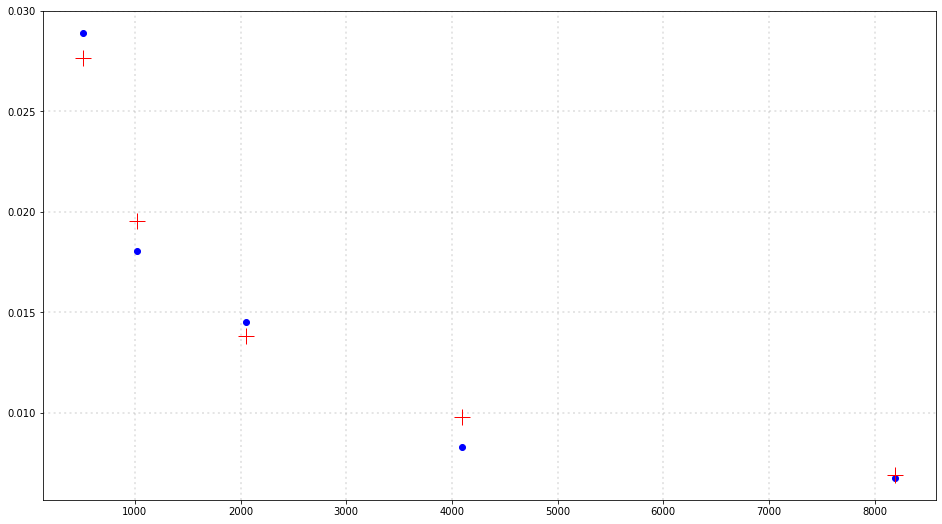

In [131]:
plt.plot(N, dp, 'bo', label='data')
plt.plot(N, dresult.best_fit, 'r+', label='fit', markersize=16)
plt.rcParams['figure.figsize'] = [16, 9]
plt.grid(b=True, color='Grey', alpha=0.2, linestyle=':', linewidth=2)
plt.show()

## Сжимаемость
Согласно http://www.sklogwiki.org/SklogWiki/index.php/Compressibility, изотермическая сжимаемость вычисляется, как $$\kappa _{T} = \frac{1}{\rho} \frac{\partial \rho}{\partial p} $$

Эту зависимость можно аналитически получить из зависимости $p(\rho)$: $$ \kappa _{T} = \frac{1}{\rho} \frac{\partial \rho}{\partial p} = \frac{1}{\rho} \frac{\partial \frac{1}{B} ln(\frac{p}{A})}{\partial p} = \frac{1}{\rho} \frac{1}{B p} = \frac{1}{\rho} \frac{1}{B A e^{B\rho}} $$

In [125]:
def kapp(x):
    return 1/(x*A*B*np.e**(B*x))

In [126]:
t = np.arange(0.1, 1.0, 0.01)
fig = px.line(x=t,y=kapp(t),labels={'x':'density', 'y':'compressibility'})
fig.update_layout(template='plotly_white')
fig.show()

## Обрезка потенциала
Потенциал Леннарда-Джонса можно обрезать на определенном расстоянии для упрощения вычислений. В данном случае радиус обрезки $r_{c}$ равен половине размера области симмуляции. В таком случае необходимо ввести поправку для давления "хвоста" - частиц на расстоянии более $r_{c}$: $$ P^{tail} = \frac{16}{3} \pi \rho^2 \left[ \frac{2}{3} \frac{1}{r_{c}^{9}} - \frac{1}{r_{c}^{3}} \right] $$

Сравнивая два способа рассчета давления можно увидеть, что оценка является не точной. Однако, точность порядка $10^{-3}$ является достаточно хорошим результатом. Можно заметить, что точность поправки выше в NVT конфигурации по сравнению с NVE.

In [127]:
nocut = pd.read_csv("cut/new/nocut.csv")
nocut.rename({'P':'P_nc'}, axis = 1, inplace = True)
cut = pd.read_csv("cut/new/cut.csv")
cut.rename({'P':'P_c'}, axis = 1, inplace = True)
diff = pd.DataFrame({'step':range(0,19999)});
diff=pd.concat([diff,nocut['P_nc']], axis=1);
diff=pd.concat([diff,cut['P_c']], axis=1);
std = nocut['P_nc'].std()
stdp = np.full(19999, std)
stdm = np.full(19999, -std)
diff['d'] = diff.apply(lambda row: (row.P_c - row.P_nc)/1, axis = 1)
print(diff)

        step        P_nc         P_c         d
0          0  155.185745  155.168777 -0.016968
1          1  155.194855  155.177841 -0.017014
2          2  155.209869  155.192841 -0.017029
3          3  155.230011  155.213135 -0.016876
4          4  155.255920  155.238861 -0.017059
...      ...         ...         ...       ...
19994  19994  257.290527  259.202911  1.912384
19995  19995  257.303101  259.229797  1.926697
19996  19996  257.315033  259.254791  1.939758
19997  19997  257.326477  259.278778  1.952301
19998  19998  257.337921  259.301422  1.963501

[19999 rows x 4 columns]


In [128]:
fig = px.line(x=diff['step'],y=diff['d'],labels={'x':'Step', 'y':'Difference'})
fig.add_scatter(x=diff['step'],y=stdp, mode='lines', line=dict(color='red', width=1, dash='dot'), name='std')
fig.add_scatter(x=diff['step'],y=stdm, mode='lines', line=dict(color='red', width=1, dash='dot'), name='std')
fig.update_layout(template='plotly_white',title=r'$\rho = 0.6$', showlegend=False)
fig.show()